<a href="https://colab.research.google.com/github/Francisco0022/Google-colab/blob/main/Algoritmo_de_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos Diabetes


In [ ]:
# Importar bibliotecas necesarias
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models

In [ ]:
# 1. Cargar Dataset
# Usaremos el dataset de cáncer de mama de sklearn para esta tarea
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
# 2. Análisis exploratorio de los datos
print(df.info())
print(df.describe())
print(df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

# 3. Plantear preguntas a responder
# Pregunta 1: ¿que grupo en funcion del genero tiene un bmi mas elevado?
# Pregunta 2: ¿Que sexo se muestra mas afectado por la diabetes?
# Pregunta 3: ¿Cual rango de edad son los mas propensos a padecer de diabetes?

In [ ]:
# 4. Preparar y limpiar los datos
df.isnull().sum()
df = df.drop_duplicates()

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

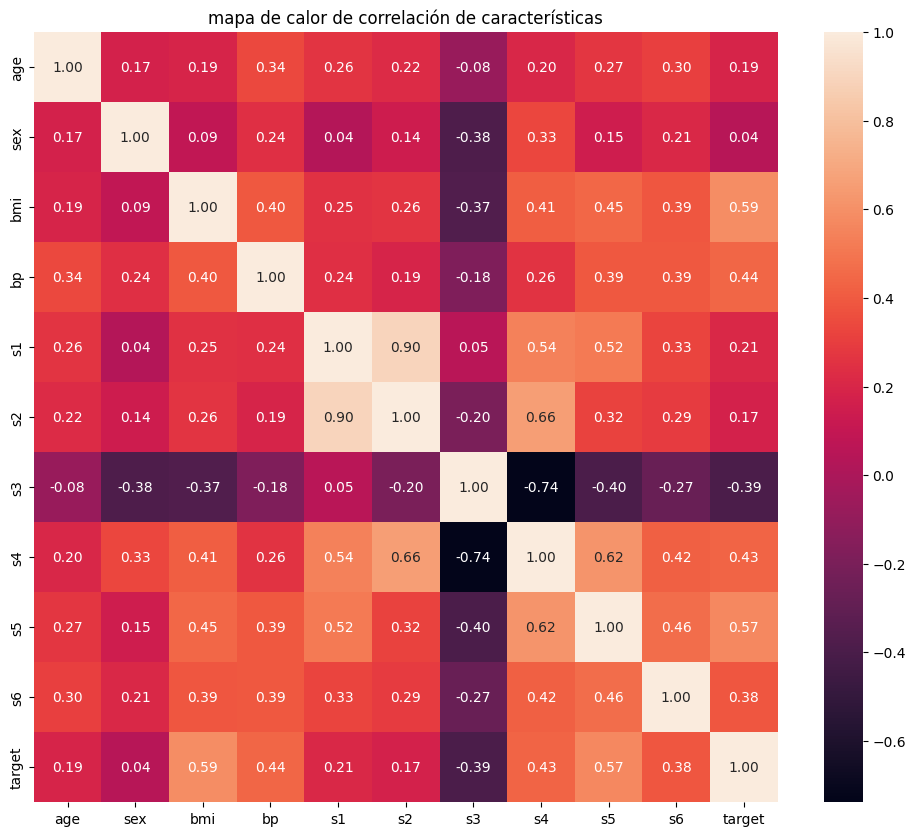

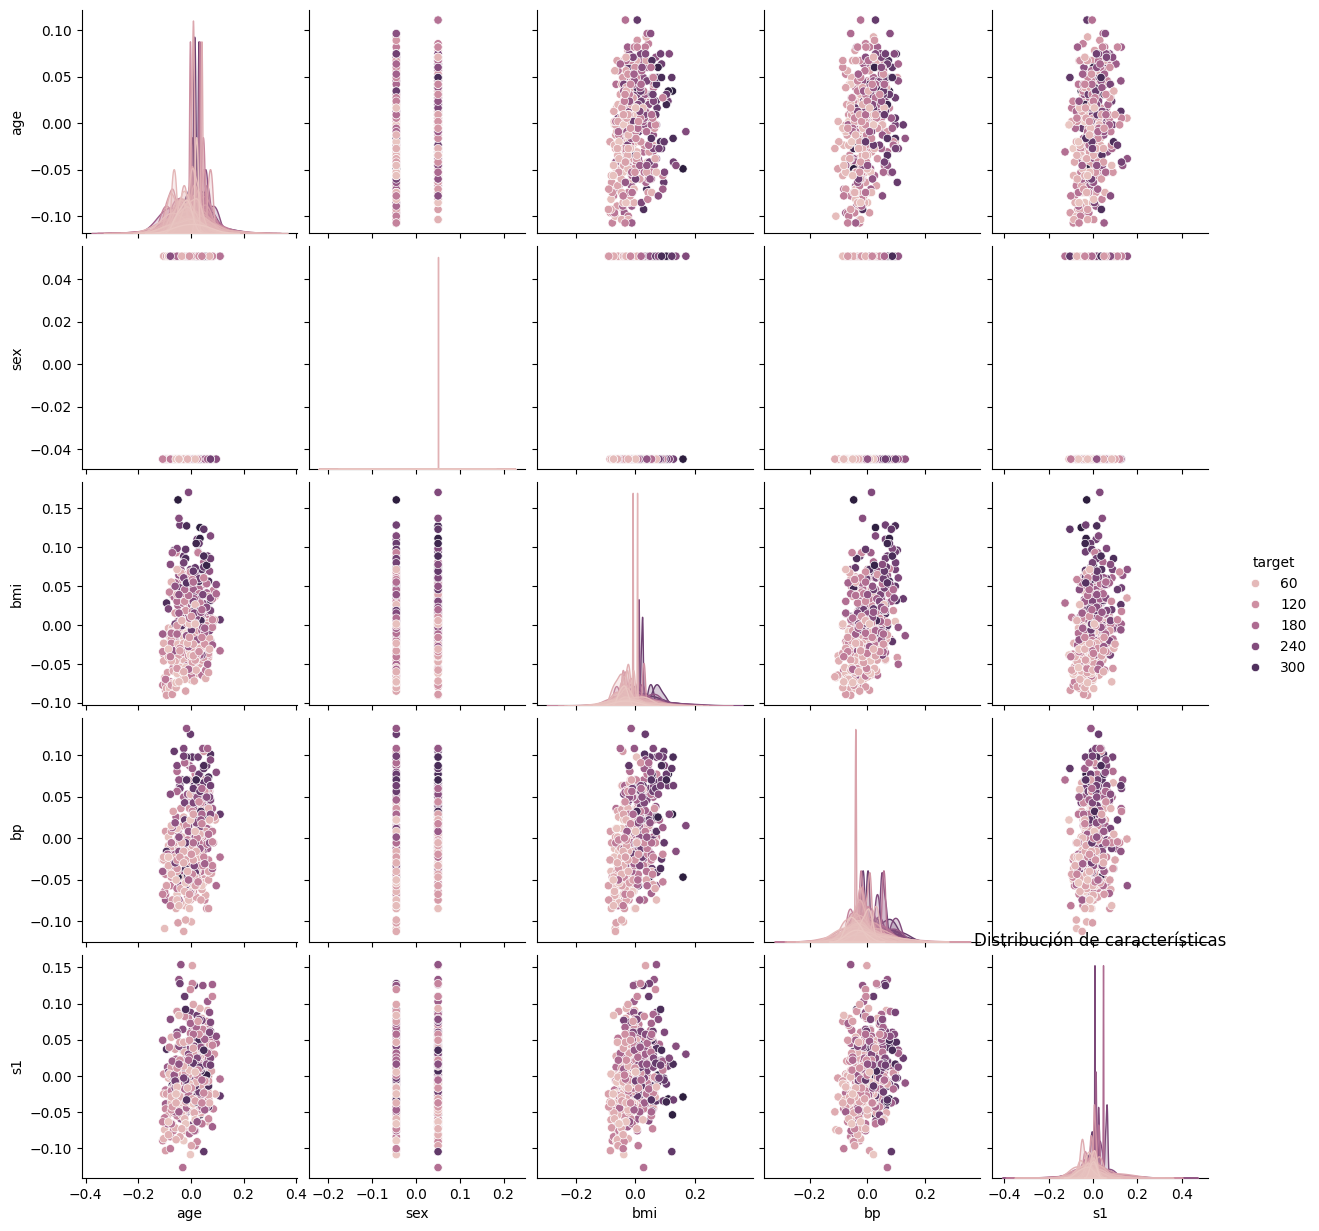

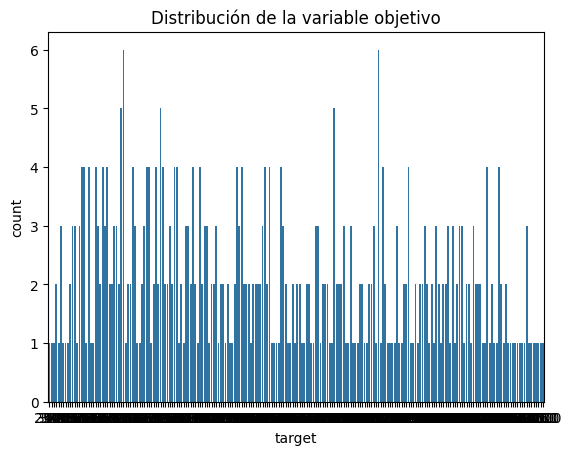

In [ ]:
# 5. Visualizaciones
# Correlación entre características
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('mapa de calor de correlación de características')
plt.show()

# Distribución de características para cada clase
sns.pairplot(df, hue='target', vars=data.feature_names[:5])
plt.title('Distribución de características')
plt.show()

# Distribución de la variable objetivo
sns.countplot(x='target', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

Epoch 1/100


c:\Users\lubra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6937 - loss: 0.6028 - val_accuracy: 0.8352 - val_loss: 0.4763
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9141 - loss: 0.4438 - val_accuracy: 0.9231 - val_loss: 0.3614
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9457 - loss: 0.3360 - val_accuracy: 0.9341 - val_loss: 0.2812
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9624 - loss: 0.2461 - val_accuracy: 0.9341 - val_loss: 0.2289
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9448 - loss: 0.2124 - val_accuracy: 0.9341 - val_loss: 0.1941
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9793 - loss: 0.1529 - val_accuracy: 0.9451 - val_loss: 0.1715
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9713 - loss: 0.1433 - val_accuracy: 0.9560 - val_loss: 0.1562
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9792 - loss: 0.1251 - val_accuracy: 0.9670 - val_loss: 0.

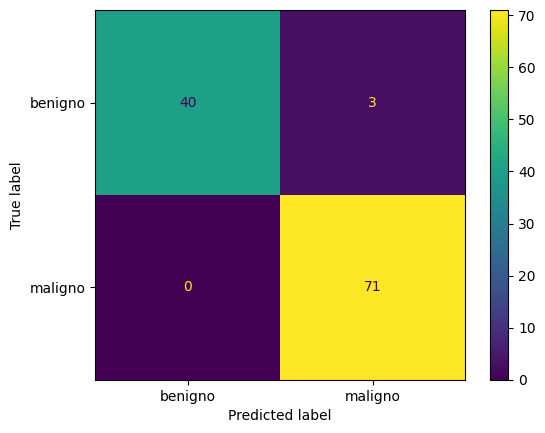

In [ ]:
# 6. Implementar un algoritmo de Machine Learning
# Definir y compilar el modelo
model = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(15, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluar el modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['','maligno']  #tarjet 0:Benigno, 1:Maligno
disp.plot()

Epoch 1/100


c:\Users\lubra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8130 - loss: 0.5548 - val_accuracy: 0.8462 - val_loss: 0.4619
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9085 - loss: 0.4213 - val_accuracy: 0.8901 - val_loss: 0.3445
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9237 - loss: 0.3155 - val_accuracy: 0.9121 - val_loss: 0.2599
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9383 - loss: 0.2233 - val_accuracy: 0.9341 - val_loss: 0.2091
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9613 - loss: 0.1528 - val_accuracy: 0.9560 - val_loss: 0.1754
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9704 - loss: 0.1066 - val_accuracy: 0.9341 - val_loss: 0.1534
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9682 - loss: 0.0992 - val_accuracy: 0.9231 - val_loss: 0.1452
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9785 - loss: 0.0840 - val_accuracy: 0.9231 - val_loss: 0.

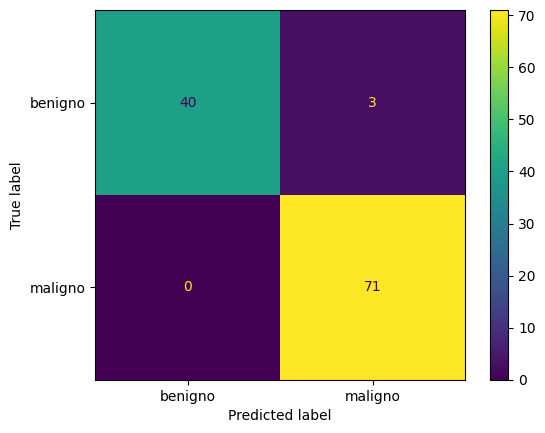

In [ ]:
# 7. Implementar una mejora
# Añadimos una capa adicional al modelo para mejorar la precisión
model_improved = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(15, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo mejorado
history_improved = model_improved.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluar el modelo mejorado
y_pred_improved = (model_improved.predict(X_test) > 0.5).astype("int32")
print("Improved Accuracy:", accuracy_score(y_test, y_pred_improved))
print(classification_report(y_test, y_pred_improved))

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['benigno','maligno']
disp.plot()

